<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/22_11_4677_Sakti_Clustering_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 0, 'Annual Income (k$)')

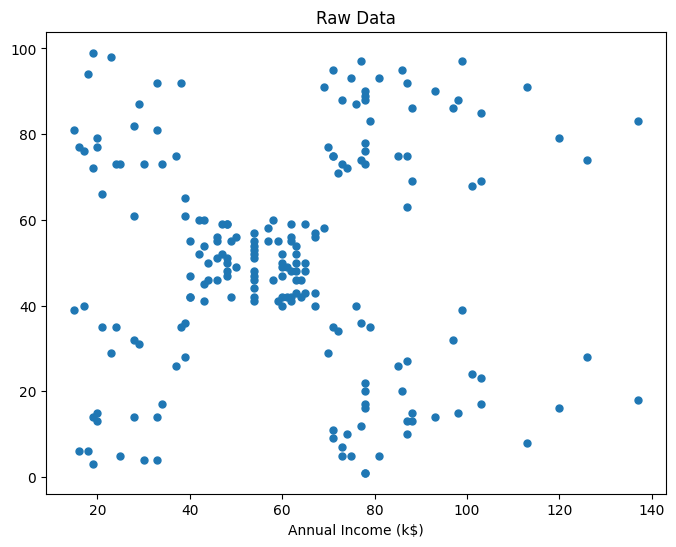

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], s = 25) #Point size is 25
plt.title('Raw Data')
plt.xlabel('Annual Income (k$)')

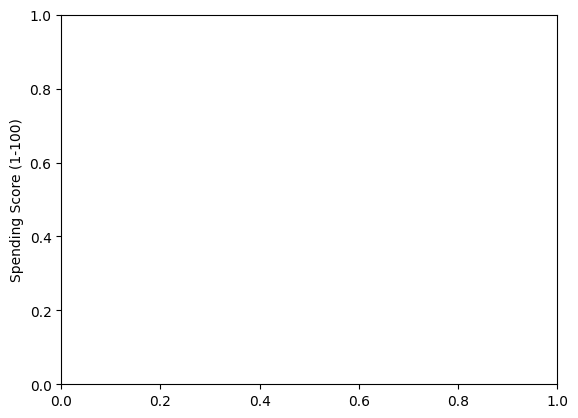

In [10]:
plt.ylabel('Spending Score (1-100)')
plt.show()

In [11]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [12]:
eps_values = np.arange(8,12.75,0.25) #parameter dalam range >=8 & <12.75 dengan kelipatan 0.25
min_samples = np.arange(3,10) #parameter dalam range >=3 & <10 dengan kelipatan 1
DBSCAN_params = list(product(eps_values, min_samples))
DBSCAN_params[:10]

[(8.0, 3),
 (8.0, 4),
 (8.0, 5),
 (8.0, 6),
 (8.0, 7),
 (8.0, 8),
 (8.0, 9),
 (8.25, 3),
 (8.25, 4),
 (8.25, 5)]

In [13]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [14]:
#melakukan iterasi untuk menghitung silhouette score berdasarkan kombinasi parameter
no_of_clusters = []
sil_score = []
for p in DBSCAN_params:
  DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
  no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
  sil_score.append(silhouette_score(X, DBS_clustering.labels_))

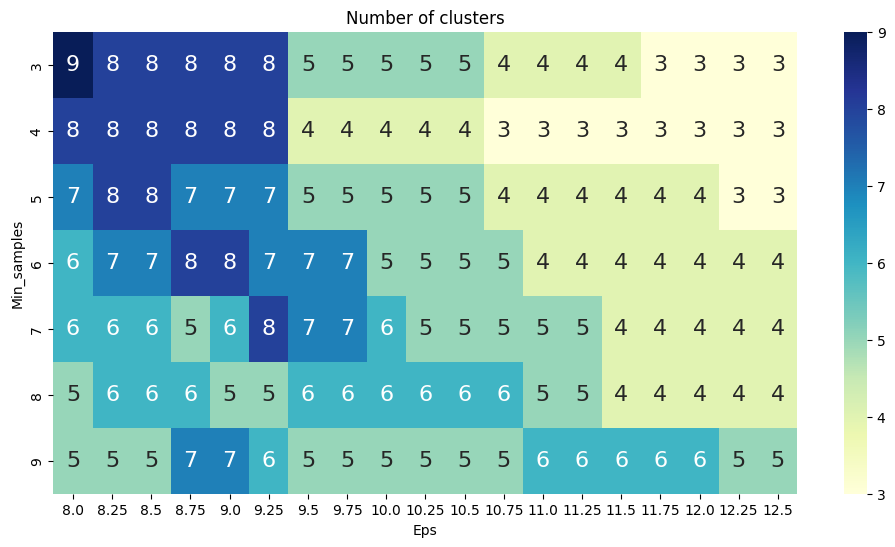

In [15]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

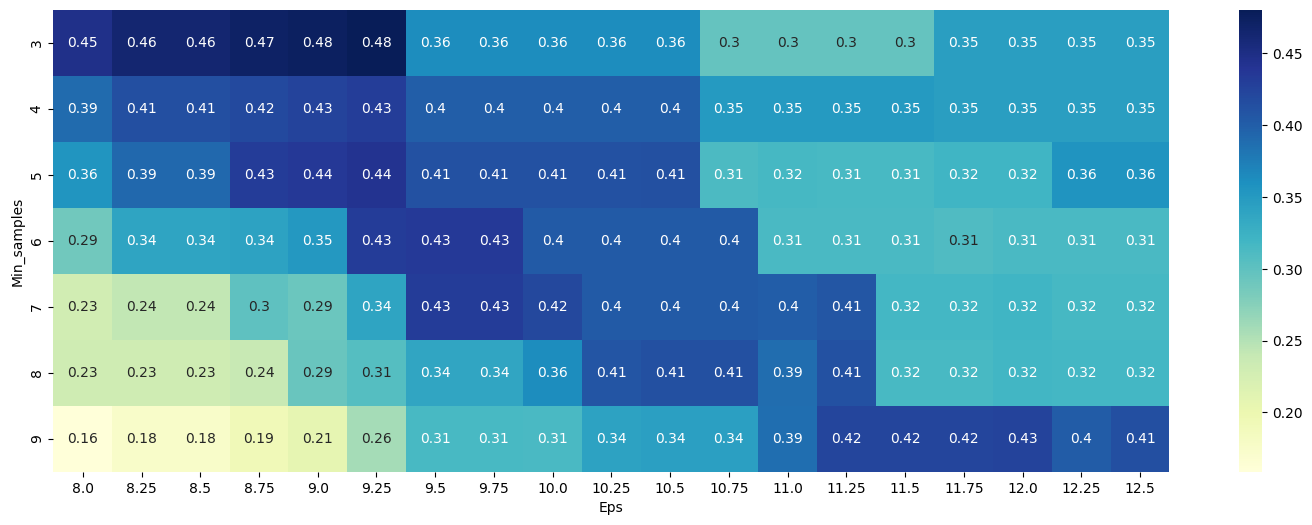

In [16]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [17]:
#sample
DBS_clustering = DBSCAN(eps=9.25, min_samples=3).fit(X)
DBSCAN_clustered = X.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_
DBSCAN_clustered.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,0
1,15,81,1
2,16,6,2
3,16,77,1
4,17,40,0


In [18]:
#menampilkan distribusi cluster
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,10
0,7
1,18
2,12
3,3
4,89
5,33
6,28


In [19]:
print(DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1])

     Annual Income (k$)  Spending Score (1-100)  Cluster
0                    15                      39        0
1                    15                      81        1
2                    16                       6        2
3                    16                      77        1
4                    17                      40        0
..                  ...                     ...      ...
185                  99                      97        5
186                 101                      24        6
188                 103                      17        6
189                 103                      85        5
190                 103                      23        6

[190 rows x 3 columns]


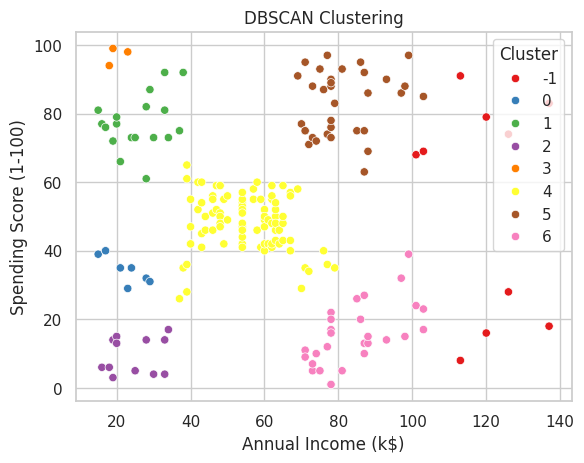

In [20]:
sns.set(style="whitegrid")
sns.scatterplot(data=DBSCAN_clustered,
x="Annual Income (k$)",
y="Spending Score (1-100)",
hue="Cluster",
palette="Set1")
plt.title("DBSCAN Clustering")
plt.show()

# Penugasan

In [22]:
!pip install kneed

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from kneed import KneeLocator
import numpy as np
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [25]:
numeric_data = data.select_dtypes(include=[np.number])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [70]:
n_neighbors = 4
nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(scaled_data)
distances, indices = nbrs.kneighbors(scaled_data)
sorted_distances = np.sort(distances[:, n_neighbors-1])

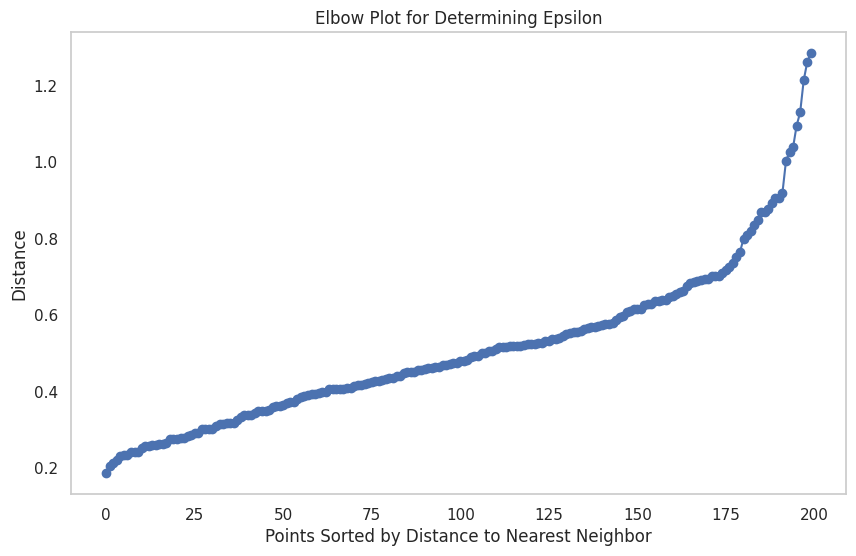

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(sorted_distances)), sorted_distances, marker='o')
plt.title("Elbow Plot for Determining Epsilon")
plt.xlabel("Points Sorted by Distance to Nearest Neighbor")
plt.ylabel("Distance")
plt.grid()
plt.show()

In [72]:
knee_locator = KneeLocator(range(len(sorted_distances)), sorted_distances, curve="convex", direction="increasing")
epsilon = sorted_distances[knee_locator.knee]

In [73]:
epsilon

0.7022513440496035

In [74]:
min_samples = 2 * scaled_data.shape[1] - 1

In [75]:
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan.fit(scaled_data)

DBSCAN(eps=0.7022513440496035, min_samples=7)

In [76]:
labels = dbscan.labels_
num_clusters = len(set(labels) - {-1})
num_outliers = list(labels).count(-1)

In [77]:
data['Cluster'] = labels

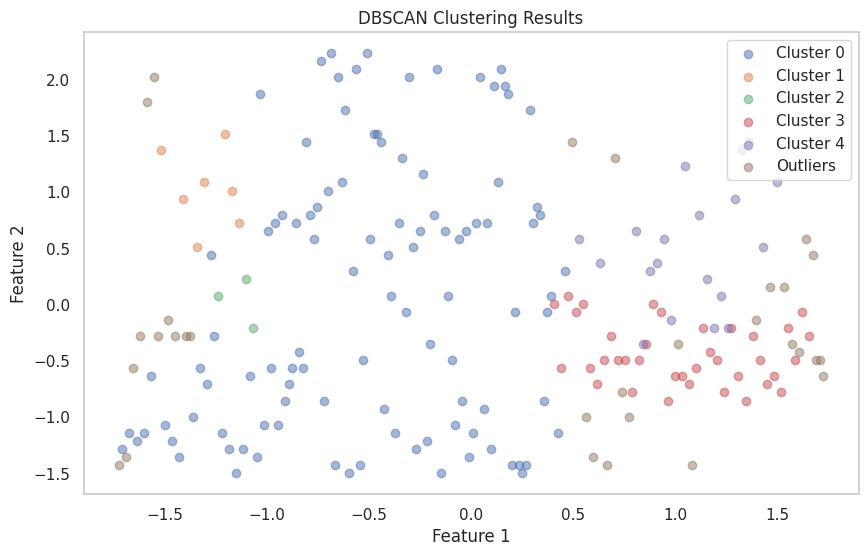

In [78]:
plt.figure(figsize=(10, 6))
for cluster_label in set(labels):
    cluster_data = scaled_data[labels == cluster_label]
    if cluster_label == -1:
        color = 'red'
        label = 'Outliers'
    else:
        color = None
        label = f'Cluster {cluster_label}'
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=label, alpha=0.5)

plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

In [79]:
results_info = {
    "epsilon": epsilon,
    "min_samples": min_samples,
    "num_clusters": num_clusters,
    "num_outliers": num_outliers
}
results_info

{'epsilon': 0.7022513440496035,
 'min_samples': 7,
 'num_clusters': 5,
 'num_outliers': 30}

# Penjelasan Atau Kesimpulan saya :
Dengan memanfaatkan elbow plot dari NearestNeighbors, saya bisa langsung mengidentifikasi nilai epsilon yang optimal secara visual melalui KneeLocator, tanpa harus mencoba-coba banyak kombinasi yang memakan waktu. Selain itu, pendekatan ini mempermudah fokus ke hasil akhir seperti jumlah outlier dan cluster, daripada membuang waktu pada pencarian hyperparameter yang bisa jadi tidak efisien.

---

Hyperparameter : Lama -> Bisa sangat efektif hasilnya.


Nearest : Cepat -> Bisa kurang efektif.